<a href="https://colab.research.google.com/github/dancher00/eeml2025/blob/main/0_intro/EEML_2024_Intro_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Colab and PyTorch Tutorial

---
**Authors**:
* Mandana Samiei (samieima@mila.quebec)
* Theodor Szente (teosz@google.com)


## Introduction to Google Colab

Google Colab is a free cloud-based Jupyter notebook environment provided by Google. It is used for machine learning, data analysis, and any Python-based computation.

## Table of Contents

1. [Getting Started](#section-1)
2. [Basic Operations](#section-2)
3. [Using a GPU](#section-3)
4. [Importing Libraries](#section-4)
5. [Loading Data](#section-5)
6. [Loading Data from a URL](#section-6)
7. [Visualizing Data](#section-7)
8. [Saving and Sharing Notebooks](#section-8)
9. [More Resources](#section-9)
---

## <a name="section-1"> 1. Getting Started </a>

To access Google Colab, you need a Google account. Follow these steps:

1. Open your web browser and go to Google Colab.
2. Sign in with your Google account if you aren't already signed in.

Once you have accessed Google Colab:

1. Click on the "File" menu.
2. Select "New notebook". This will create a new Colab notebook, which you can start using immediately.

## <a name="section-2"> 2. Basic Operations </a>

Google Colab notebooks are composed of cells. There are two main types of cells:

**Code Cells**: Used to write and execute Python code.

**Text Cells (Markdown Cells)**: Used to add text, titles, and explanations to your notebook using Markdown syntax.

###Running a Code Cell

Click the `Run` button next to the cell, or press `Shift + Enter` to execute the code in the cell. Run the following cell to see the print out.

In [ ]:
print('Hello, EEML2024!')

Hello, EEML2024!


###Running a Text Cell


###This is a heading
This is some text.

To read more about cells, please look into [More Resources](#section-9) reference [1]. To learn more about Markdown, please check reference [2].

## <a name="section-3"> 3. Using a GPU</a>
You can connect to a virtual machine with a GPU. To select the hardware you want to use, follow either


* **Edit > Notebook settings,** or


* **Runtime > Change runtime type**


and choose a hardware accelerator.

Note: GPU availability can be stochastic and short-lived, especially in shared or cloud environments. Always ensure to have fallback mechanisms in place for CPU execution.


### GPU vs CPU

In [ ]:
import torch

def func(x):
  return torch.sin(x) / x

x = torch.ones((1000, 1000))
x.device

print('computation time using CPU')
%timeit func(x)

computational time using CPU
7.33 ms ± 958 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
import torch

if torch.cuda.is_available():
  device = 'cuda:0'
  print(torch.cuda.get_device_name(0))
else:
  print("Change runtime type to GPU")

Tesla T4


In [ ]:
def func(x):
  return torch.sin(x) / x

x = torch.ones((1000, 1000))
x = x.to(device)
x.device

print('computation time using GPU')
%timeit func(x)


computation time using GPU
87.5 µs ± 45 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## <a name="section-4">4. Importing Libraries</a>
You can import and use popular libraries such as NumPy, Pandas, and Matplotlib in Colab.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example: Create a NumPy array and print it
array = np.array([1, 2, 3, 4, 5])
print("NumPy Array:", array)

NumPy Array: [1 2 3 4 5]


### Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

###Install **GraphViz**

In [ ]:
!apt-get -qq install -y graphviz
import graphviz

## <a name="section-5">5. Loading Data</a>
This cell demonstrates how to mount Google Drive, load a file, and read it into a pandas DataFrame.

Steps:
1. Mount Google Drive:
   - drive.mount('/content/drive'): This command mounts your Google Drive to the Colab environment, making it accessible like a local file system.
   - Note: Users can also use the Directory icon in the side menu to upload and download files interactively.

2. File Path Parameter:
   - file_path = '/content/drive/MyDrive/your_file.csv'  # @param {type:"string"}
   - This line uses an interactive form parameter to allow users to input the file path.
   - Users can check out the "Resources" section in Google Colab for more interactive form options.

3. Load and Display Data:
   - pd.read_csv(file_path): Reads the specified CSV file into a pandas DataFrame.
   - print(data.head()): Displays the first few rows of the DataFrame to verify the data.



In [ ]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

# Load a file from Google Drive
# Interactive form to input the file path
file_path = '/content/drive/MyDrive/your_file.csv'  # @param {type:"string"}

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())

## <a name="section-6"> 6. Loading Data from a URL </a>
This cell demonstrates how to load a dataset from a URL and display its first few rows using pandas.

Steps:
1. Dataset URL:
   - The URL points to the Iris dataset hosted on the MIT OpenCourseWare website.

2. Loading the Dataset:
   - pd.read_csv(url): Reads the CSV file from the provided URL into a pandas DataFrame.

3. Displaying the Data:
   - print(data.head()): Displays the first five rows of the DataFrame to provide a quick preview of the dataset.

The Iris dataset is a classic dataset used in machine learning, containing 150 observations of iris flowers with four features: sepal length, sepal width, petal length, and petal width, along with the target variable indicating the species of the iris flower.


In [ ]:
# URL of the dataset
url = 'https://ocw.mit.edu/courses/15-097-prediction-machine-learning-and-statistics-spring-2012/89d88c5528513adc4002a1618ce2efb0_iris.csv'

# Load the dataset from the URL
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


## <a name="section-7"> 7. Visualizing Data </a>

This cell demonstrates how to create a simple histogram using Matplotlib.

Imports:
- numpy as np: A library for numerical computations and handling arrays.
- matplotlib.pyplot as plt: A plotting library used for creating static, animated, and interactive visualizations.
- seaborn as sns: A data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.

Steps:
1. Generate Random Data:
   - data = np.random.randn(100): Generates 100 random numbers from a standard normal distribution (mean = 0, standard deviation = 1) using NumPy.

2. Create a Histogram:
   - plt.hist(data, bins=30): Creates a histogram of the generated data with 30 bins.
   - A histogram is a graphical representation of the distribution of numerical data, showing the frequency of data points in each bin.

3. Add Title and Show Plot:
   - plt.title('Histogram'): Adds a title to the histogram.
   - plt.show(): Displays the histogram.

The histogram provides a visual representation of the distribution of the randomly generated data.



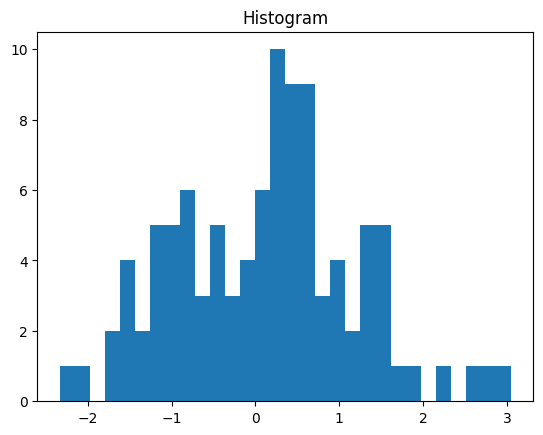

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Create a simple plot
data = np.random.randn(100)

# Create a histogram of the data with 30 bins
plt.hist(data, bins=30)
plt.title('Histogram')
plt.show()

## <a name="section-8"> 8. Saving and Sharing Notebooks </a>

### Saving Notebooks
Click on File > Save a copy in Drive to save your notebook in Google Drive.

### Sharing Notebooks
Click on Share in the top-right corner to share your notebook with others. You can set the access permissions to view or edit.


## <a name="section-9">9. More Resources</a>

### Working with Notebooks in Colab

</div>

1. [Overview of Colab](/notebooks/basic_features_overview.ipynb)
2. [Guide to Markdown](/notebooks/markdown_guide.ipynb)
3. [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
4. [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
5. [Interactive forms](/notebooks/forms.ipynb)
6. [Interactive widgets](/notebooks/widgets.ipynb)


###**With these basics, you're ready to start using Google Colab for your projects. Happy coding!**